In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

# Case Study

## Load the dataset and Plot 

In [124]:
oil = pd.read_csv('./oil_prices.csv')
oil['Date'] = pd.to_datetime(oil.Date)
oil['Price'] = [float(str(i).replace(",", ".")) for i in oil['Price']]
oil.set_index('Date', inplace=True)
oil = oil.loc['2005':]
oil.head()

,Price
Date,
2005-01-04,40.75
2005-01-05,41.00
2005-01-06,43.25
2005-01-07,43.28
2005-01-10,44.71


In [111]:
ingredient = pd.read_csv('./ingredient_prices.csv', parse_dates=['Date'], index_col = 'Date')
ingredient['Price'] = [float(str(i).replace(",", ".")) for i in ingredient['Price']]
ingredient.head()

,Price
Date,
2005-01-01,570.0
2005-02-01,570.0
2005-03-01,610.0
2005-04-01,600.0
2005-05-01,570.0


In [42]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8385 entries, 1987-05-20 to 2020-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   8375 non-null   float64
dtypes: float64(1)
memory usage: 131.0 KB


In [95]:
ingredient.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2005-01-01 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   183 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


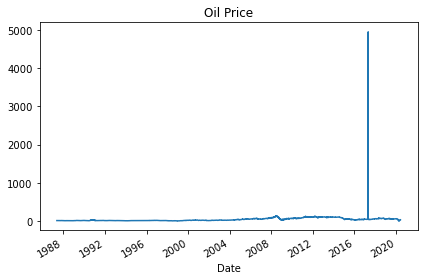

In [69]:
oil.Price.plot(title='Oil Price')
plt.tight_layout()
plt.show()

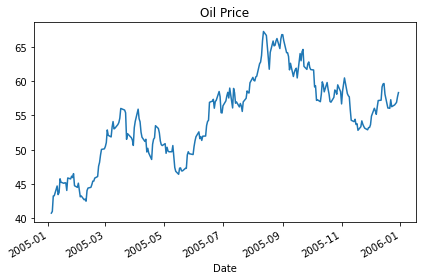

In [66]:
oil['2005':'2005'].Price.plot(title='Oil Price')
plt.tight_layout()
plt.show()

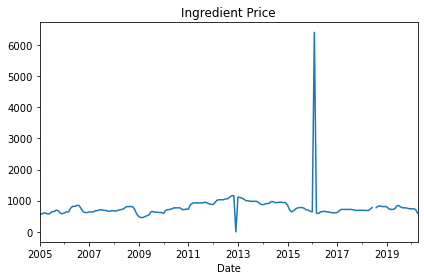

In [48]:
ingredient.Price.plot(title='Ingredient Price')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

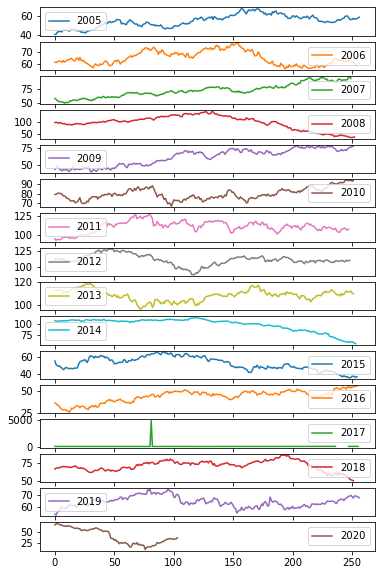

In [116]:
oil_prices = pd.DataFrame()
for year in range(2005, 2021):
    price_per_year = oil.loc[str(year), ['Price']].reset_index(drop=True)
    price_per_year.rename(columns={'Price': str(year)}, inplace=True)
    oil_prices = pd.concat([oil_prices, price_per_year], axis = 1)

fig = plt.figure()
oil_prices.plot(subplots=True, figsize=(6,10))
plt.show()

<Figure size 432x288 with 0 Axes>

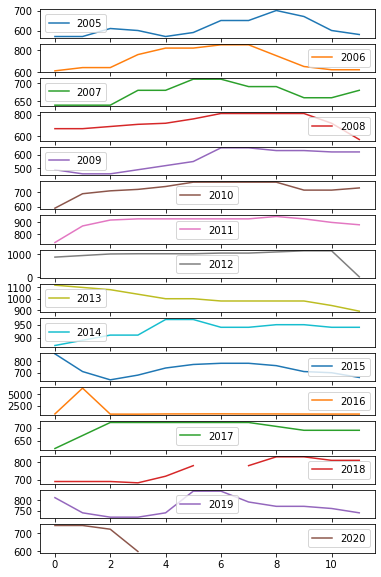

In [117]:
ingredient_prices = pd.DataFrame()
for year in range(2005, 2021):
    price_per_year = ingredient.loc[str(year), ['Price']].reset_index(drop=True)
    price_per_year.rename(columns={'Price': str(year)}, inplace=True)
    ingredient_prices = pd.concat([ingredient_prices, price_per_year], axis = 1)

fig = plt.figure()
ingredient_prices.plot(subplots=True, figsize=(6,10))
plt.show()

## Oil shift and lag

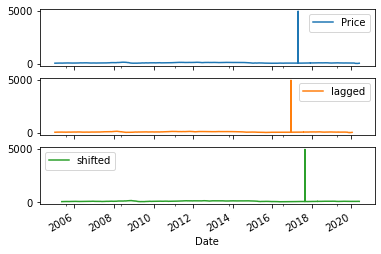

In [123]:
oil['lagged'] = oil.Price.shift(periods=-90)
oil['shifted'] = oil.Price.shift(periods=90)
oil.plot(subplots=True)
plt.show()

## Missing Valus

In [7]:
oil = oil[oil.Date >= '2005-01-01']

In [8]:
oil[oil.Price.isnull()]

,Date,Price
7753,2017-12-01,NaN
7754,2017-12-04,NaN
7755,2017-12-05,NaN
7756,2017-12-06,NaN
7757,2017-12-07,NaN
7758,2017-12-08,NaN
7759,2017-12-11,NaN
7760,2017-12-12,NaN
7761,2017-12-13,NaN
7762,2017-12-14,NaN


In [9]:
ingredient[ingredient.Price.isnull()]

,Date,Price
162,2018-07-01,NaN


## EDA

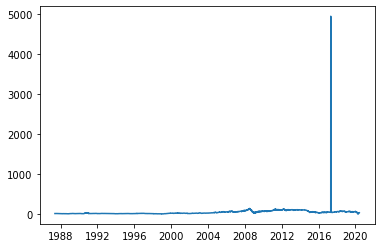

In [6]:
plt.plot(oil.Date, oil.Price)

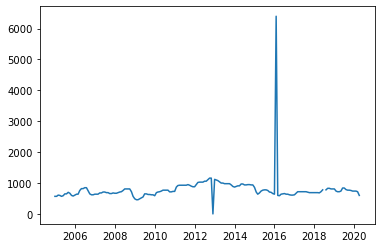

In [98]:
plt.plot(ingredient.Date,ingredient.Price)

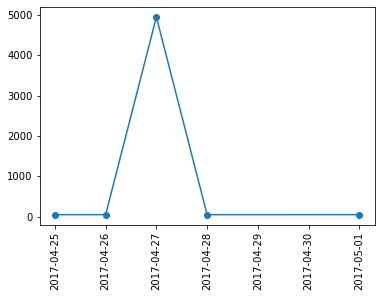

In [156]:
plt.plot(oil['2017-4-25':'2017-5-1'],marker='o')
plt.xticks(rotation=90)
plt.show()

In [152]:
oil['2017-4-25':'2017-5-1']

,Price
Date,
2017-04-25,49.37
2017-04-26,49.99
2017-04-27,4946.00
2017-04-28,49.46
2017-05-01,50.41


<AxesSubplot:xlabel='Date'>

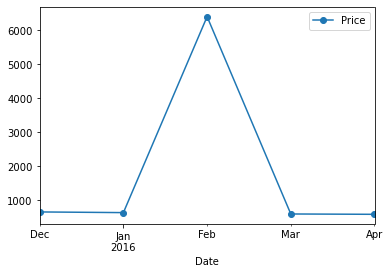

In [143]:
ingredient['2015-12':'2016-4'].plot(marker='o')

In [153]:
ingredient['2015-12':'2016-4']

,Price
Date,
2015-12-01,660.0
2016-01-01,640.0
2016-02-01,6400.0
2016-03-01,600.0
2016-04-01,590.0


<AxesSubplot:xlabel='Date'>

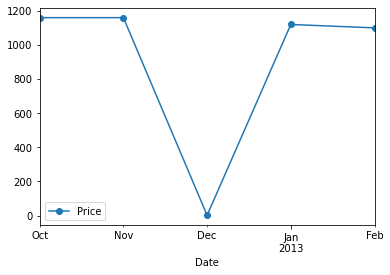

In [142]:
ingredient['2012-10':'2013-2'].plot(marker='o')

In [144]:
ingredient['2012-10':'2013-2']

,Price
Date,
2012-10-01,1160.00
2012-11-01,1160.00
2012-12-01,1.13
2013-01-01,1120.00
2013-02-01,1100.00


## Oil Price Prediction

In [42]:
# oil_3y = oil[oil.Date < '2008-01-01']
oil_3y = oil[oil.Date < '2005-10-01']

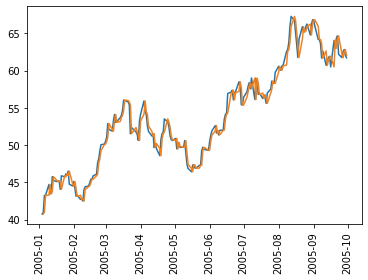

In [44]:
plt.plot(oil_3y.Date, oil_3y.Price)
plt.plot(oil_3y.Date[1:], oil_3y.Price[:-1])
plt.xticks(rotation=90)
plt.show()

In [49]:
print(tf.keras.metrics.mean_squared_error(oil_3y.Price[1:], oil_3y.Price[:-1]).numpy())

1.2328796875000012


In [80]:
oil.Date

0       5/20/1987
1       5/21/1987
2       5/22/1987
3       5/25/1987
4       5/26/1987
          ...    
8380    5/26/2020
8381    5/27/2020
8382    5/28/2020
8383    5/29/2020
8384     6/1/2020
Name: Date, Length: 8385, dtype: object